# Detailed Evaluation

This notebook shows how to produce some tables and plots for analysing results. This is meant as a starting point, because eah game will require a custom evaluation depending on its metrics and experiments.

This notebook uses the output files of evaluation/bencheval.py. Run that first.

In [50]:
import sys
sys.path.append('..')

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon

import evaluation.evalutils as utils
from evaluation.makingtables import build_dispersion_table
import clemgame.metrics as clemmetrics

Choose path for the .csv with the raw scores. This is created after running ```bencheval.py```.

In [51]:
RAW_PATH = Path('../results/raw.csv')
raw_df = pd.read_csv(RAW_PATH, index_col=0)

Let's inspect the contents of ```data```:

In [52]:
# raw_df = raw_df[raw_df.experiment=='0_full_game_4p']
raw_df

,game,model,experiment,episode,metric,value
0,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Aborted,0.0
1,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Request Count,9.0
2,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Parsed Request Count,9.0
3,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Violated Request Count,0.0
4,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Request Success Ratio,1.0
...,...,...,...,...,...,...
103,wizardsapprentice,Qwen2-72B-Instruct-t0.0--programmatic-t0.0--pr...,0_test_game,episode_0,Played,1.0
104,wizardsapprentice,Gemma7B-t0.0--programmatic-t0.0--programmatic-...,0_test_game,episode_0,Played,0.0
105,wizardsapprentice,Qwen2-72B-Instruct-t0.0--Llama-3-70B-Together....,0_test_game,episode_0,Played,1.0
106,wizardsapprentice,Llama-3-70B-Together.ai-t0.0--custom-t0.0--cus...,0_test_game,episode_0,Played,1.0


If we want to evaluate a single game and the results directory contained more games, we can filter the game column:

In [40]:
# game_df = raw_df[raw_df.game == 'privateshared']
# game_df

## Overview tables

Get dispersion metrics over all episodes. Note that we use groupby, which will ignore NaN values, according to the documentation!

In [53]:
stats_df = build_dispersion_table(['game', 'model', 'metric'], raw_df) # could also use raw_df for results for all games
stats_df

mean   
game              model                                              metric                         
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             Aborted                  1.0  \
                                                                     Lose                     0.0   
                                                                     Main Score               0.0   
                                                                     Parsed Request Count     0.0   
                                                                     Played                   0.0   
...                                                                                           ...   
                  programmatic-t0.0--programmatic-t0.0--programma... Played                   1.0   
                                                                     Request Count            9.0   
                                                                     Request Success Ratio    1.0   
                                                                     Success                  0.0   
                                                                     Violated Request Count   0.0   

                                                                                             std   
game              model                                              metric                        
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             Aborted                 NaN  \
                                                                     Lose                    NaN   
                                                                     Main Score              NaN   
                                                                     Parsed Request Count    NaN   
                                                                     Played                  NaN   
...                                                                                          ...   
                  programmatic-t0.0--programmatic-t0.0--programma... Played                  NaN   
                                                                     Request Count           NaN   
                                                                     Request Success Ratio   NaN   
                                                                     Success                 NaN   
                                                                     Violated Request Count  NaN   

                                                                                             var   
game              model                                              metric                        
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             Aborted                 NaN  \
                                                                     Lose                    NaN   
                                                                     Main Score              NaN   
                                                                     Parsed Request Count    NaN   
                                                                     Played                  NaN   
...                                                                                          ...   
                  programmatic-t0.0--programmatic-t0.0--programma... Played                  NaN   
                                                                     Request Count           NaN   
                                                                     Request Success Ratio   NaN   
                                                                     Success                 NaN   
                                                                     Violated Request Count  NaN   

                                                                                             median   
game              model                                              metri

Break results down by experiment:

In [54]:
detailed_stats_df = build_dispersion_table(['game', 'model', 'experiment', 'metric'], raw_df) # could also use raw_df for results for all games
detailed_stats_df

mean   
game              model                                              experiment  metric                         
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             0_test_game Aborted                  1.0  \
                                                                                 Lose                     0.0   
                                                                                 Main Score               0.0   
                                                                                 Parsed Request Count     0.0   
                                                                                 Played                   0.0   
...                                                                                                       ...   
                  programmatic-t0.0--programmatic-t0.0--programma... 0_test_game Played                   1.0   
                                                                                 Request Count            9.0   
                                                                                 Request Success Ratio    1.0   
                                                                                 Success                  0.0   
                                                                                 Violated Request Count   0.0   

                                                                                                         std   
game              model                                              experiment  metric                        
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             0_test_game Aborted                 NaN  \
                                                                                 Lose                    NaN   
                                                                                 Main Score              NaN   
                                                                                 Parsed Request Count    NaN   
                                                                                 Played                  NaN   
...                                                                                                      ...   
                  programmatic-t0.0--programmatic-t0.0--programma... 0_test_game Played                  NaN   
                                                                                 Request Count           NaN   
                                                                                 Request Success Ratio   NaN   
                                                                                 Success                 NaN   
                                                                                 Violated Request Count  NaN   

                                                                                                         var   
game              model                                              experiment  metric                        
wizardsapprentice Gemma7B-t0.0--custom-t0.0--custom-t0.0             0_test_game Aborted                 NaN  \
                                                                                 Lose                    NaN   
                                                                                 Main Score              NaN   
                                                                                 Parsed Request Count    NaN   
                                                                                 Played                  NaN   
...                                                                                                      ...   
                  programmatic-t0.0--programmatic-t0.0--programma... 0_test_game Played                  NaN   
                                                                                 Request Count           NaN   
                                                          

To save the table, call ```to_csv```, ```to_html``` and/or ```to_latex``` (there are also other formats and customization options, check the pandas docs):

In [55]:
stats_df.to_csv('../results/stats.csv')

## Basic Plots

Plots can of course be created with ```matplotlib``` directly, but ```seaborn``` makes it very easy to work with pandas dataframes. Let's create a barplot with an overview by model and experiment:

In [56]:
# choose a metric
METRIC = 'Main Score'
metric_df = raw_df[raw_df.metric == METRIC].sort_values('experiment')
metric_df

,game,model,experiment,episode,metric,value
7,wizardsapprentice,Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Main Score,11.111111
15,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_test_game,episode_0,Main Score,11.111111
23,wizardsapprentice,custom-t0.0--custom-t0.0--custom-t0.0,0_test_game,episode_0,Main Score,38.888889
31,wizardsapprentice,custom-t0.0--Llama-3-70B-Together.ai-t0.0--Qwe...,0_test_game,episode_0,Main Score,33.333333
39,wizardsapprentice,Llama-3-70B-Together.ai-t0.0--programmatic-t0....,0_test_game,episode_0,Main Score,33.333333
47,wizardsapprentice,custom-t0.0--Llama-3-70B-Together.ai-t0.0--Lla...,0_test_game,episode_0,Main Score,38.888889
55,wizardsapprentice,Llama-3-70B-Together.ai-t0.0--Qwen2-72B-Instru...,0_test_game,episode_0,Main Score,33.333333
63,wizardsapprentice,Qwen2-72B-Instruct-t0.0--programmatic-t0.0--pr...,0_test_game,episode_0,Main Score,11.111111
71,wizardsapprentice,Gemma7B-t0.0--programmatic-t0.0--programmatic-...,0_test_game,episode_0,Main Score,0.000000
79,wizardsapprentice,Qwen2-72B-Instruct-t0.0--Llama-3-70B-Together....,0_test_game,episode_0,Main Score,11.111111


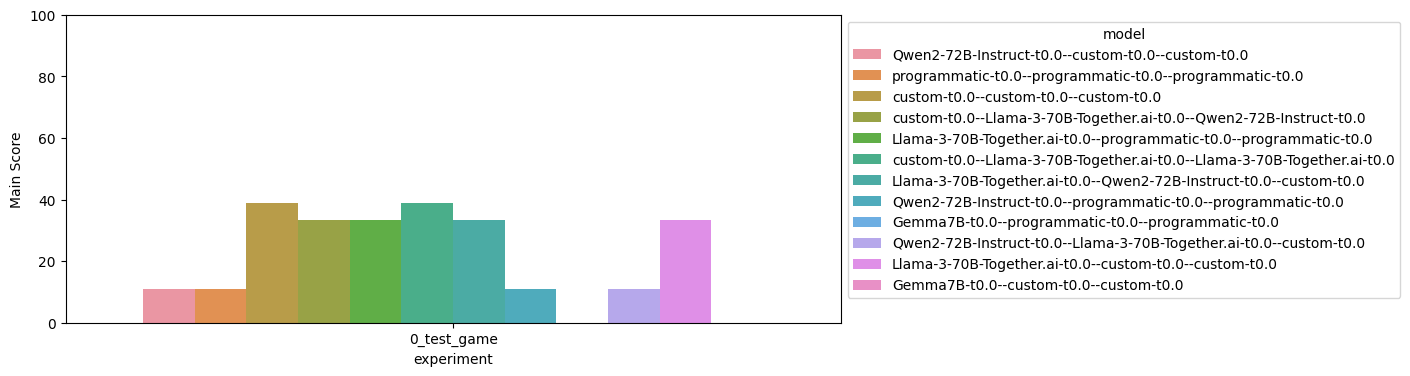

In [57]:
# change the figure size according to your needs
fig, ax = plt.subplots(figsize=(10, 4))

# choose what goes in each axis and legend according to your needs
# you can also e.g. swap y and hue, to get games in the legend and models in the axis
g = sns.barplot(metric_df,
                x='experiment',
                y='value',
                hue='model', 
                ax=ax)

# customize plot details according to your needs
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 100)
plt.ylabel(METRIC)

plt.show()

## Benchmark plots

Reproducing Figure 10 in the paper. As more models or games are added, sizes must be adjusted accordingly:

In [46]:
# read the clem scores
RESULTS_PATH = Path('../results/results.csv')
clem_df = pd.read_csv(RESULTS_PATH, index_col=0)
clem_df

,"-, clemscore","all, Average % Played","all, Average Quality Score","wizardsapprentice, % Played","wizardsapprentice, Quality Score","wizardsapprentice, Quality Score (std)"
Gemma7B-t0.0--custom-t0.0--custom-t0.0,0.00,0.0,0.00,0.0,0.00,NaN
Gemma7B-t0.0--programmatic-t0.0--programmatic-t0.0,0.00,0.0,0.00,0.0,0.00,NaN
Llama-3-70B-Together.ai-t0.0--Qwen2-72B-Instruct-t0.0--custom-t0.0,33.33,100.0,33.33,100.0,33.33,NaN
Llama-3-70B-Together.ai-t0.0--custom-t0.0--custom-t0.0,33.33,100.0,33.33,100.0,33.33,NaN
Llama-3-70B-Together.ai-t0.0--programmatic-t0.0--programmatic-t0.0,33.33,100.0,33.33,100.0,33.33,NaN
Qwen2-72B-Instruct-t0.0--Llama-3-70B-Together.ai-t0.0--custom-t0.0,11.11,100.0,11.11,100.0,11.11,NaN
Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0,11.11,100.0,11.11,100.0,11.11,NaN
Qwen2-72B-Instruct-t0.0--programmatic-t0.0--programmatic-t0.0,11.11,100.0,11.11,100.0,11.11,NaN
custom-t0.0--Llama-3-70B-Together.ai-t0.0--Qwen2-72B-Instruct-t0.0,33.33,100.0,33.33,100.0,33.33,NaN
custom-t0.0--custom-t0.0--custom-t0.0,38.89,100.0,38.89,100.0,38.89,NaN


Horizontal bar plot with player, aborted, lost:

In [58]:
STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']

df_aux = raw_df[raw_df.metric.isin(utils.GAMEPLAY_METRICS)]
print(df_aux)
df_aux = (df_aux.pivot(index=['game', 'model', 'experiment', 'episode'],
                       columns='metric',
                       values='value')
                .reset_index()
                .drop(columns=['game', 'experiment', 'episode'])
                .groupby('model')
                .sum()
                .sort_values(axis=1, by='metric', ascending=False))

percs = 100 * df_aux.div(df_aux.sum(axis=1), axis=0)
order = clem_df.sort_values(by='-, clemscore').index
percs = percs.reindex(order)

percs.plot(kind='barh',
           stacked=True,
           figsize=(5, 5),
           colormap=ListedColormap(STACK_COLORS))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.xlabel('% of all episodes')
plt.xlim(-1, 101)
plt.ylabel('')
plt.show()

                 game                                              model   
0   wizardsapprentice  Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0  \
5   wizardsapprentice  Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0   
6   wizardsapprentice  Qwen2-72B-Instruct-t0.0--custom-t0.0--custom-t0.0   
8   wizardsapprentice  programmatic-t0.0--programmatic-t0.0--programm...   
13  wizardsapprentice  programmatic-t0.0--programmatic-t0.0--programm...   
14  wizardsapprentice  programmatic-t0.0--programmatic-t0.0--programm...   
16  wizardsapprentice              custom-t0.0--custom-t0.0--custom-t0.0   
21  wizardsapprentice              custom-t0.0--custom-t0.0--custom-t0.0   
22  wizardsapprentice              custom-t0.0--custom-t0.0--custom-t0.0   
24  wizardsapprentice  custom-t0.0--Llama-3-70B-Together.ai-t0.0--Qwe...   
29  wizardsapprentice  custom-t0.0--Llama-3-70B-Together.ai-t0.0--Qwe...   
30  wizardsapprentice  custom-t0.0--Llama-3-70B-Together.ai-t0.0--Qwe...   
32  wizardsa

Bar plot with the sorted clemscores (they were not sorted in the paper):

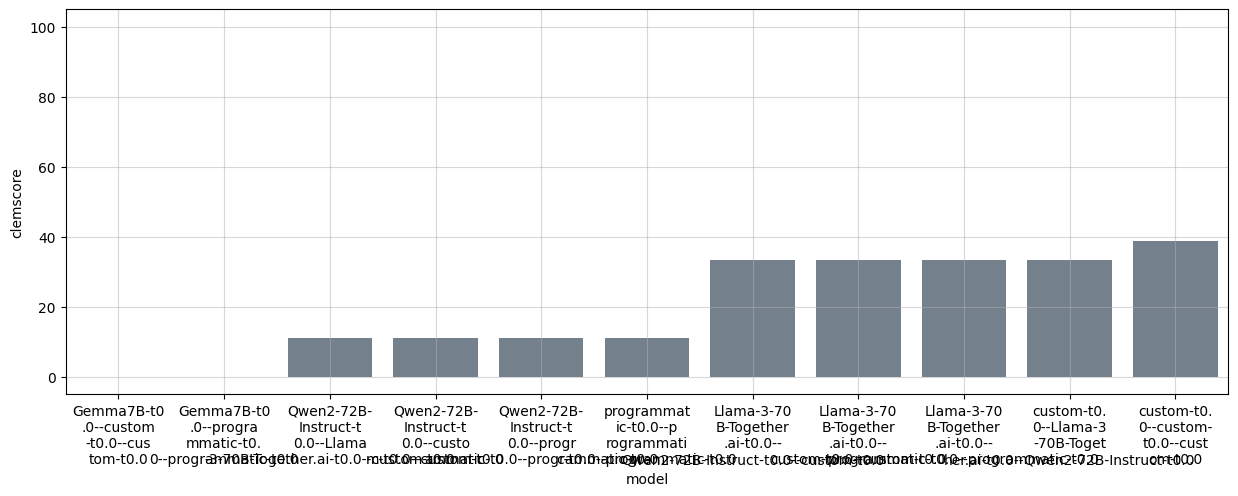

In [48]:
clem_aux = clem_df.sort_values(by='-, clemscore').reset_index(names='model')
# below is a hack to make the current names fit the plot
# ideally a dictionary with short names should be used as in the original implementation for the paper
# warning, if models have matching names up the limit, results will be wrongly merged!
clem_aux['model'] = clem_aux['model'].apply(lambda x: f'{x[:10]}\n{x[10:20]}\n{x[20:30]}\n{x[30:]}')

fig = plt.figure(figsize=(15, 5))
sns.barplot(clem_aux, x='model', y='-, clemscore', color='slategray')
plt.ylim(-5, 105)
plt.ylabel('clemscore')
plt.grid(alpha=0.5)
plt.show()

Polygons. This can get complicated if more games are added. In particular, COLUMN_ORDER must be adjusted. For more models, the number of subplots and figsize must be adjusted.

IndexError: list index out of range

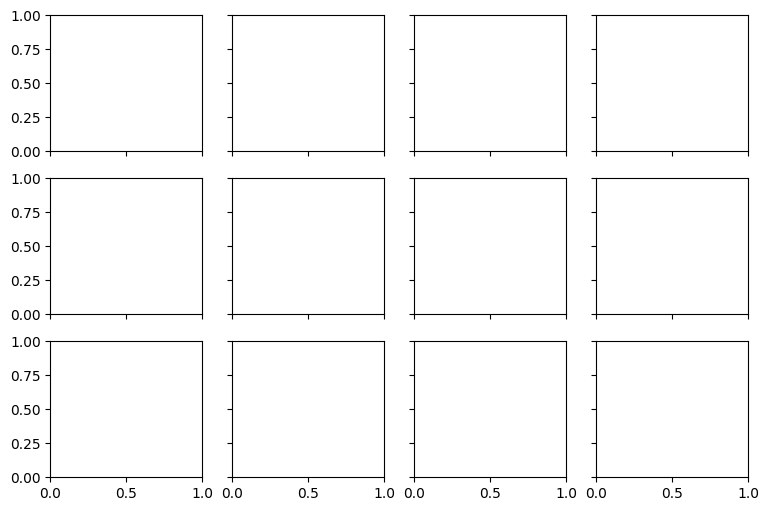

In [49]:
def ccw_sort(p):
    """Put the nodes in clockwise order."""
    # from https://stackoverflow.com/a/44143444 by user ImportanceOfBeingEarnest
    p = np.array(p)
    mean = np.mean(p, axis=0)
    d = p - mean
    s = np.arctan2(d[:, 0], d[:, 1])
    return p[np.argsort(s), :]

fig, ax_list = plt.subplots(3, 4, figsize=(9, 6), sharey=True, sharex=True)
axs = ax_list.flatten()

for n, (model, model_df) in enumerate(raw_df.groupby('model')):
    rows = model_df.metric.isin(utils.MAIN_METRICS)
    df_aux = model_df[rows]
    df_aux = (df_aux.pivot(index=['game', 'experiment', 'episode'],
                            columns='metric',
                            values='value')
                    .reset_index())
    df_aux = df_aux.drop(['episode'], axis=1)

    # create the x and y coordinates for each game
    dots = []
    for game, game_df in df_aux.groupby('game'):
        overall_means = (game_df.mean(numeric_only=True)
                                .fillna(0))
        # replace missing score by 0 when all aborted
        played = overall_means[clemmetrics.METRIC_PLAYED] * 100
        score = overall_means[clemmetrics.BENCH_SCORE]
        dots.append((game, played, score))
    labels, played, scores = zip(*dots)

    # put them in a good order for the polygon
    edges = ccw_sort(list(zip(played, scores)))

    # create the polygon and draw it
    polygon = Polygon(edges, facecolor='lightgray')
    axs[n].add_patch(polygon)

    legend = True if n == 10 else False
    g = sns.scatterplot(x=played,
                        y=scores,
                        hue=labels,
                        style=labels,
                        hue_order=utils.COLUMN_ORDER[1:],
                        style_order=utils.COLUMN_ORDER[1:],
                        s=80,
                        ax=axs[n],
                        legend=legend)
    axs[n].set_xlim(-5, 105)
    axs[n].set_ylim(-5, 105)
    axs[n].set_ylabel('avr. quality')
    axs[n].set_xlabel('% played')
    axs[n].set_title(model, fontsize=8)

fig.legend(loc='lower right', bbox_to_anchor=(0.98, 0.08))
axs[10].legend().set_visible(False)
fig.delaxes(axs[11])
plt.tight_layout()
plt.show()